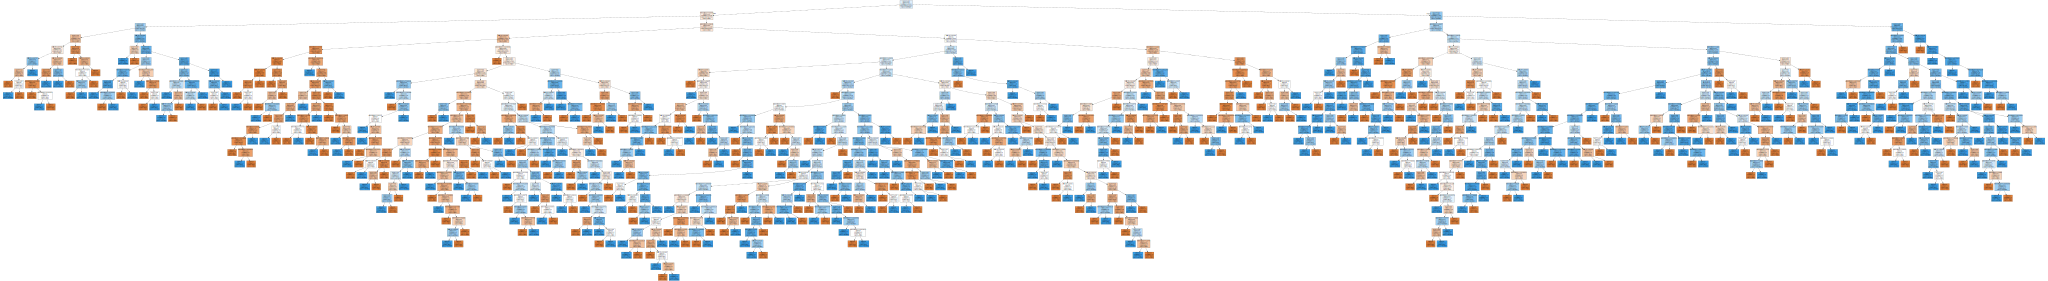

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Загрузка данных
df = pd.read_csv("biofam.csv", delimiter = ';')

# Удаление столбца id
df.drop(columns=['idhous'], inplace=True)
df.drop(columns=['nat_1_02'], inplace=True)
df.drop(columns=['plingu02'], inplace=True)
df.drop(columns=['p02r01'], inplace=True)
df.drop(columns=['p02r04'], inplace=True)
df.drop(columns=['cspfaj'], inplace=True)
df.drop(columns=['cspmoj'], inplace=True)


# Замена значений столбца sex
df['sex'].replace({0: 'woman', 1: 'man'}, inplace=True)

# Разделение на признаки и целевую переменную
X = df.drop(columns=['sex'])
y = df['sex']

# Создание модели дерева решений
clf = DecisionTreeClassifier(random_state=42)

# Тренировка модели
clf.fit(X, y)

# Создание файла .dot для построения графа дерева решений
dot_file = export_graphviz(clf, out_file='tree.dot', feature_names=X.columns, class_names=y.unique(), filled=True)

# Отображение графа дерева решений
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


